# Visualising the RodoSol ALPR Dataset

The following notebook will:
- Demonstrate how to use the RodoSolDataset class.
- Perform exploratory analysis on the dataset, and
- Visualise example images and labels.

In [1]:
import sys
import os

# Add the src folder to the Python path
sys.path.append(os.path.abspath("../src"))

# Now import the dataset class correctly
from datasets.RodoSolDataset import RodoSolDataset

In [2]:
data_dir = "../data/RodoSol-ALPR"  # Path to the dataset folder

# Instantiate the dataset
dataset = RodoSolDataset(data_dir)

print(f"Dataset size: {len(dataset)}")

# Get the first 5 samples
for i in range(5):
    image, label = dataset[i]
    print(f"Sample {i}: {label}")

Dataset size: 20000
Sample 0: {'type': 'car', 'plate': 'MSY1064', 'layout': 'Brazilian', 'corners': [747, 188, 77, 29], 'image': '../data/RodoSol-ALPR/images/cars-br/img_001134.jpg'}
Sample 1: {'type': 'car', 'plate': 'PEC1230', 'layout': 'Brazilian', 'corners': [797, 320, 135, 48], 'image': '../data/RodoSol-ALPR/images/cars-br/img_003723.jpg'}
Sample 2: {'type': 'car', 'plate': 'PPP8761', 'layout': 'Brazilian', 'corners': [663, 358, 132, 49], 'image': '../data/RodoSol-ALPR/images/cars-br/img_003045.jpg'}
Sample 3: {'type': 'car', 'plate': 'ODT6166', 'layout': 'Brazilian', 'corners': [463, 412, 124, 44], 'image': '../data/RodoSol-ALPR/images/cars-br/img_001652.jpg'}
Sample 4: {'type': 'car', 'plate': 'MTX1539', 'layout': 'Brazilian', 'corners': [629, 299, 108, 36], 'image': '../data/RodoSol-ALPR/images/cars-br/img_000558.jpg'}


In [42]:
# Check the first sample
image, label = dataset[0]
print("Sample Label:", label)

Sample Label: {'type': 'car', 'plate': 'MSY1064', 'layout': 'Brazilian', 'corners': [(747, 189), (824, 188), (824, 217), (747, 217)], 'image': '../data/RodoSol-ALPR/images/cars-br/img_001134.jpg'}


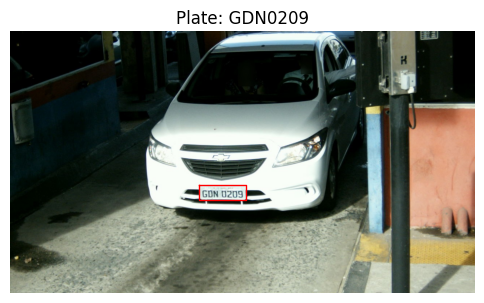

In [6]:
import matplotlib.pyplot as plt
from torchvision.transforms import ToPILImage

# Function to display a sample
def show_sample(idx):
    image, label = dataset[idx]
    
    # Convert tensor to PIL image
    to_pil = ToPILImage()
    image = to_pil(image)
    
    # Plot image
    plt.figure(figsize=(6,6))
    plt.imshow(image)
    plt.axis("off")
    plt.title(f"Plate: {label.get('plate', 'N/A')}")
    
    # Draw bounding box if available
    if "corners" in label:
        x_min, y_min, width, height = label["corners"]
    
        # Reconstruct the four corners
        corners = [
            (x_min, y_min),  # Top-left
            (x_min + width, y_min),  # Top-right
            (x_min + width, y_min + height),  # Bottom-right
            (x_min, y_min + height),  # Bottom-left
        ]
    
    # Extract x and y coordinates separately
    x_coords, y_coords = zip(*corners)
    
    # Close the polygon (connect last point to first)
    x_coords += (x_coords[0],)
    y_coords += (y_coords[0],)

    plt.plot(x_coords, y_coords, color="red", linewidth=1)

    plt.show()

# Show the first image
show_sample(10)

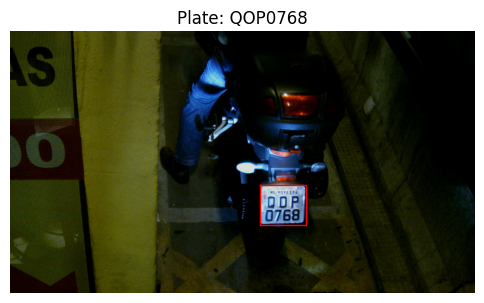

In [7]:
# Get motorcycle example
motorcycle_examples = dataset.img_labels[dataset.img_labels["type"] == "motorcycle"]
motorcycle_idx = motorcycle_examples.index[10]
show_sample(motorcycle_idx)